In [2]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
import pandas as pd
df = pd.read_csv("data.csv")

print(df.head())


     Brand                   Model  Price Currency  Year Engine Size  \
0      Kia                      K5  46900      AZN  2025       1.5 L   
1      UAZ                   Profi  43500      AZN  2023       2.7 L   
2  Changan               Uni-V iDD  17500      USD  2025       1.5 L   
3     Ford  Fusion (North America)  19700      AZN  2016       1.5 L   
4  Changan                   Uni-Z  34000      AZN  2025       1.5 L   

  Horsepower       Fuel Type    Distance       Color                Body Type  \
0        170          Benzin        0 km        Qara                    Sedan   
1        150          Benzin        0 km          Ağ      Pikap, ikiqat kabin   
2        325  Plug-in Hibrid        0 km  Yaş Asfalt                  Liftbek   
3        181          Benzin  175 000 km         Boz                    Sedan   
4        215  Plug-in Hibrid    3 293 km  Açıq yaşıl  Offroader / SUV, 5 qapı   

   ProdYear Transmission Drive Type   New Seats Owners  \
0      2025        Rob

In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

df['Price'] = df['Price'].astype(str).str.replace(' ', '').str.replace(',', '.').astype(float)

df['Distance'] = df['Distance'].astype(str).str.replace('[^0-9]', '', regex=True).astype(float)

df['Engine Size'] = df['Engine Size'].str.extract('([0-9]+\.?[0-9]*)')[0].astype(float)

df['New'] = df['New'].map({'Bəli':1, 'Xeyr':0})

print(df.isnull().sum())
df.head()


Brand              0
Model              0
Price              0
Currency           0
Year               0
Engine Size        0
Horsepower         0
Fuel Type          0
Distance           0
Color              0
Body Type          0
ProdYear           0
Transmission       0
Drive Type         0
New                0
Seats           1445
Owners          4449
Condition          0
Market          1726
City               0
dtype: int64


,Brand,Model,Price,Currency,Year,Engine Size,Horsepower,Fuel Type,Distance,Color,Body Type,ProdYear,Transmission,Drive Type,New,Seats,Owners,Condition,Market,City
0,Kia,K5,46900.0,AZN,2025,1.5,170,Benzin,0.0,Qara,Sedan,2025,Robot,Ön,1,NaN,NaN,"Vuruğu yoxdur, rənglənməyib",Rəsmi diler,Bakı
1,UAZ,Profi,43500.0,AZN,2023,2.7,150,Benzin,0.0,Ağ,"Pikap, ikiqat kabin",2023,Mexaniki,Tam,1,5,NaN,"Vuruğu yoxdur, rənglənməyib",NaN,Bakı
2,Changan,Uni-V iDD,17500.0,USD,2025,1.5,325,Plug-in Hibrid,0.0,Yaş Asfalt,Liftbek,2025,Variator,Ön,1,4,NaN,"Vuruğu yoxdur, rənglənməyib",Çin,Bakı
3,Ford,Fusion (North America),19700.0,AZN,2016,1.5,181,Benzin,175000.0,Boz,Sedan,2016,Avtomat,Ön,0,5,0,"Vuruğu yoxdur, rənglənməyib",Amerika,Bakı
4,Changan,Uni-Z,34000.0,AZN,2025,1.5,215,Plug-in Hibrid,3293.0,Açıq yaşıl,"Offroader / SUV, 5 qapı",2025,Variator,Ön,0,5,0,"Vuruğu yoxdur, rənglənməyib",Çin,Bakı


In [48]:
import pandas as pd

df = pd.read_csv("data.csv")
df_clean = df[~df['Engine Size'].str.contains("a.g.|hp", na=False)].copy()  # .copy() ilə yeni DataFrame yaradılır
df_clean.loc[:, 'Engine Size Clean'] = df_clean['Engine Size'].str.extract('(\d+\.?\d*)')[0].astype(float)

df_clean.loc[df_clean['Engine Size'].str.contains('L', na=False), 'Engine Size Clean'] *= 1000

df_clean.to_csv("data_cleaned.csv", index=False)
print("Təmizlənmiş dataset 'data_cleaned.csv' adı ilə saxlanıldı.")


Təmizlənmiş dataset 'data_cleaned.csv' adı ilə saxlanıldı.


In [52]:
print(df_clean.isnull().sum())

Brand                   0
Model                   0
Price                   0
Currency                0
Year                    0
Engine Size             0
Horsepower              0
Fuel Type               0
Distance                0
Color                   0
Body Type               0
ProdYear                0
Transmission            0
Drive Type              0
New                     0
Seats                1396
Owners               4310
Condition               0
Market               1678
City                    0
Engine Size Clean       0
dtype: int64


In [54]:
print("Dublikat sayısı:", df_clean.duplicated().sum())


Dublikat sayısı: 4615


In [56]:
print(df_clean['Engine Size Clean'].describe())
print(df_clean['Price'].describe())

count     7965.000000
mean      2256.057753
std       1245.866103
min       1000.000000
25%       1500.000000
50%       2000.000000
75%       2400.000000
max      13000.000000
Name: Engine Size Clean, dtype: float64
count      7965.000000
mean      31828.354426
std       29997.565603
min        1500.000000
25%       16500.000000
50%       25400.000000
75%       37000.000000
max      440000.000000
Name: Price, dtype: float64


In [58]:
print(df_clean['Brand'].unique())

['Kia' 'UAZ' 'Changan' 'Ford' 'Lexus' 'Mercedes' 'Toyota' 'BMW' 'Audi'
 'Fiat' 'Isuzu' 'Chevrolet' 'Hyundai' 'Voyah' 'KamAz' 'BYD' 'Nissan'
 'LADA' 'Opel' 'Bentley' 'Land' 'Baic' 'JETOUR' 'MAN' 'JAC' 'Maserati'
 'JMC' 'Jeep' 'Wuling' 'GWM' 'Denza' 'GAC' 'Avatr' 'Geely' 'Mitsubishi'
 'Daewoo' 'GAZ' 'Lincoln' 'Mazda' 'Suzuki' 'DFSK' 'Dodge' 'Subaru'
 'Volkswagen' 'Lynk' 'Khazar' 'Honda' 'DAF' 'Skoda' 'Li' 'Cadillac' 'PAZ'
 'Leapmotor' 'Volvo' 'Porsche' 'Yutong' 'Renault' 'Mercedes-Maybach' 'MG'
 'KAIYI' 'Ravon' 'Chery' 'Alfa' 'Iveco' 'Haval' 'Hummer' 'FAW' 'SEAT' 'KG'
 'Tofas' 'Infiniti' 'Seres' 'DongFeng' 'Genesis' 'Saipa' 'HOWO' 'Iran'
 'Mini' 'Soueast' 'Abarth' 'Peugeot' 'Ssang' 'Skywell' 'Bestune'
 'Forthing' 'ROX' 'MAZ' 'Golden' 'Scania' 'VGV' 'Jaguar' 'Foton']


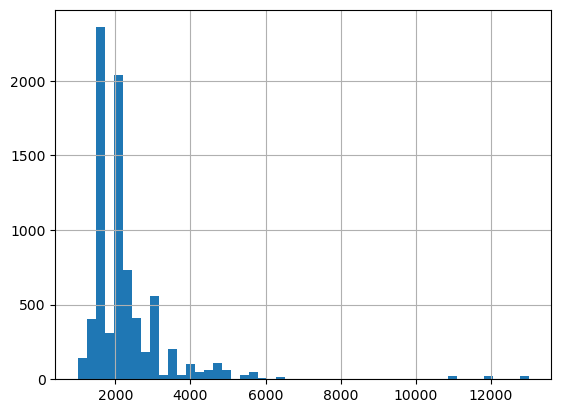

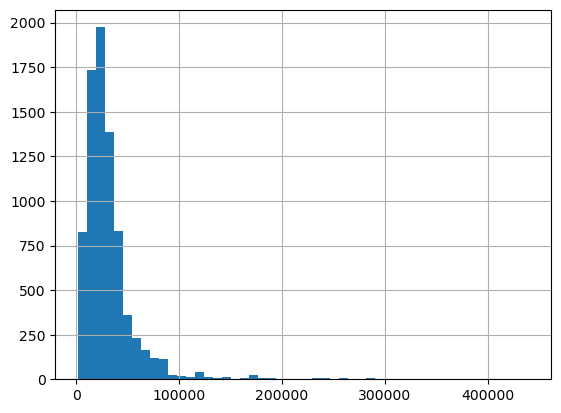

In [60]:
import matplotlib.pyplot as plt

df_clean['Engine Size Clean'].hist(bins=50)
plt.show()

df_clean['Price'].hist(bins=50)
plt.show()


In [64]:
df_clean['Market'].fillna("Unknown", inplace=True)

In [74]:
df_clean['Seats'] = df_clean['Seats'].astype(str)


In [76]:
df_clean['Seats'] = df_clean['Seats'].str.replace('+', '', regex=False)


In [78]:
df_clean['Seats'] = df_clean['Seats'].astype(float)


In [80]:
import pandas as pd

df = pd.read_csv("data.csv")

df_clean = df[~df['Engine Size'].astype(str).str.contains("a.g.|hp", na=False)].copy()

df_clean.loc[:, 'Engine Size Clean'] = df_clean['Engine Size'].str.extract('(\d+\.?\d*)')[0].astype(float)

df_clean.loc[df_clean['Engine Size'].str.contains('L', na=False), 'Engine Size Clean'] *= 1000

df_clean['Seats'] = df_clean['Seats'].astype(str).str.replace('+', '', regex=False)
df_clean['Seats'] = pd.to_numeric(df_clean['Seats'], errors='coerce')

df_clean['Seats'].fillna(df_clean['Seats'].median(), inplace=True)

df_clean['Market'].fillna("Unknown", inplace=True)

df_clean.drop(columns=['Owners'], inplace=True)

df_clean.to_csv("data_cleaned_final.csv", index=False)
print("Təmizlənmiş dataset 'data_cleaned_final.csv' adı ilə saxlanıldı.")


Təmizlənmiş dataset 'data_cleaned_final.csv' adı ilə saxlanıldı.


In [85]:
print("Dublikat sayısı:", df_clean.duplicated().sum())

Dublikat sayısı: 4622


In [ ]:
# Dublikat olan satırların index-ləri
print(df_clean[df_clean.duplicated(keep=False)].index)

In [89]:
duplicate_rows = df_clean[df_clean.duplicated(keep=False)]
print(duplicate_rows)


         Brand                   Model  Price Currency  Year Engine Size  \
0          Kia                      K5  46900      AZN  2025       1.5 L   
5        Lexus                 ES 300h  48900      USD  2024       2.5 L   
7     Mercedes                    Vito  49000      AZN  2017       2.2 L   
8         Ford  Fusion (North America)  19500      AZN  2019       1.5 L   
9       Toyota                   Camry  23500      USD  2018       2.5 L   
...        ...                     ...    ...      ...   ...         ...   
8225    Nissan                  Altima  20900      AZN  2014       2.5 L   
8226   Hyundai                 Elantra  20000      AZN  2017       2.0 L   
8227    Nissan                    Note  15700      AZN  2015       1.2 L   
8228      Jeep          Grand Cherokee  29900      AZN  2012       3.6 L   
8229   Porsche                 Cayenne  53000      AZN  2017       3.6 L   

     Horsepower Fuel Type    Distance   Color                Body Type  \
0           1

In [93]:
duplicate_counts = df_clean.groupby(list(df_clean.columns)).size().reset_index(name='Count')
duplicates_only = duplicate_counts[duplicate_counts['Count'] > 1]
print(duplicates_only)


       Brand         Model   Price Currency  Year Engine Size Horsepower  \
0     Abarth    124 Spider   17000      USD  2017       1.4 L        170   
2       Alfa  Romeo Giulia   46500      USD  2022       2.0 L        280   
3       Audi            A4    9500      AZN  2007       2.0 L        200   
4       Audi            A4   14500      USD  2013       2.0 L        211   
5       Audi            A4   20500      USD  2016       2.0 L        249   
...      ...           ...     ...      ...   ...         ...        ...   
3337   Voyah          Free   35900      USD  2025       1.5 L        490   
3338   Voyah          Free   36400      USD  2025       1.5 L        490   
3339   Voyah          Free   38000      USD  2025       1.5 L        490   
3340   Voyah          Free   38000      USD  2025       1.5 L        490   
3342  Yutong       ZK6128H  360000      AZN  2025       9.7 L        276   

           Fuel Type    Distance       Color  ... ProdYear  Transmission  \
0          

In [95]:
import pandas as pd

df = pd.read_csv("data.csv")
df_clean = df[~df['Engine Size'].astype(str).str.contains("a.g.|hp", na=False)].copy()
df_clean.loc[:, 'Engine Size Clean'] = df_clean['Engine Size'].str.extract('(\d+\.?\d*)')[0].astype(float)
df_clean.loc[df_clean['Engine Size'].str.contains('L', na=False), 'Engine Size Clean'] *= 1000

df_clean['Seats'] = df_clean['Seats'].astype(str).str.replace('+', '', regex=False)
df_clean['Seats'] = pd.to_numeric(df_clean['Seats'], errors='coerce')
df_clean['Seats'].fillna(df_clean['Seats'].median(), inplace=True)

df_clean['Market'].fillna("Unknown", inplace=True)
df_clean.drop(columns=['Owners'], inplace=True)

duplicate_rows = df_clean[df_clean.duplicated(keep=False)]
print(f"Dublikat satır sayı: {len(duplicate_rows)}")

duplicate_rows.to_csv("duplicates.csv", index=False)
print("Bütün dublikatlar 'duplicates.csv' faylına yazıldı.")

df_clean = df_clean.drop_duplicates()
df_clean.to_csv("data_cleaned_final.csv", index=False)
print("Təmizlənmiş dataset 'data_cleaned_final.csv' adı ilə saxlanıldı.")


Dublikat satır sayı: 6649
Bütün dublikatlar 'duplicates.csv' faylına yazıldı.
Təmizlənmiş dataset 'data_cleaned_final.csv' adı ilə saxlanıldı.


In [97]:
import pandas as pd
df_clean = pd.read_csv("data_cleaned_final.csv")
print("Dataset ölçüləri (satır, sütun):", df_clean.shape)

print("\nBoş hüceyrələr hər sütunda:\n", df_clean.isnull().sum())
print("\nDublikat sayısı:", df_clean.duplicated().sum())

numeric_cols = ['Price', 'Engine Size Clean', 'Seats']
print("\nRəqəmli sütunların statistikası:\n", df_clean[numeric_cols].describe())

categorical_cols = ['Brand', 'Model', 'Fuel Type', 'Body Type', 'Transmission', 'Drive Type', 'City', 'Market']
for col in categorical_cols:
    print(f"\n{col} üzrə ən çox təkrarlanan 10 dəyər:\n", df_clean[col].value_counts().head(10))


Dataset ölçüləri (satır, sütun): (3343, 20)

Boş hüceyrələr hər sütunda:
 Brand                0
Model                0
Price                0
Currency             0
Year                 0
Engine Size          0
Horsepower           0
Fuel Type            0
Distance             0
Color                0
Body Type            0
ProdYear             0
Transmission         0
Drive Type           0
New                  0
Seats                0
Condition            0
Market               0
City                 0
Engine Size Clean    0
dtype: int64

Dublikat sayısı: 0

Rəqəmli sütunların statistikası:
                Price  Engine Size Clean        Seats
count    3343.000000        3343.000000  3343.000000
mean    32670.682022        2258.510320     5.119055
std     31040.030516        1271.975635     0.796201
min      1500.000000        1000.000000     2.000000
25%     17000.000000        1500.000000     5.000000
50%     25800.000000        2000.000000     5.000000
75%     38000.000000       

Brand payı:
 Brand
Toyota       411
Hyundai      410
Mercedes     385
Kia          304
BMW          212
Changan      198
Ford         153
Land         150
Chevrolet    138
LADA         113
Name: count, dtype: int64


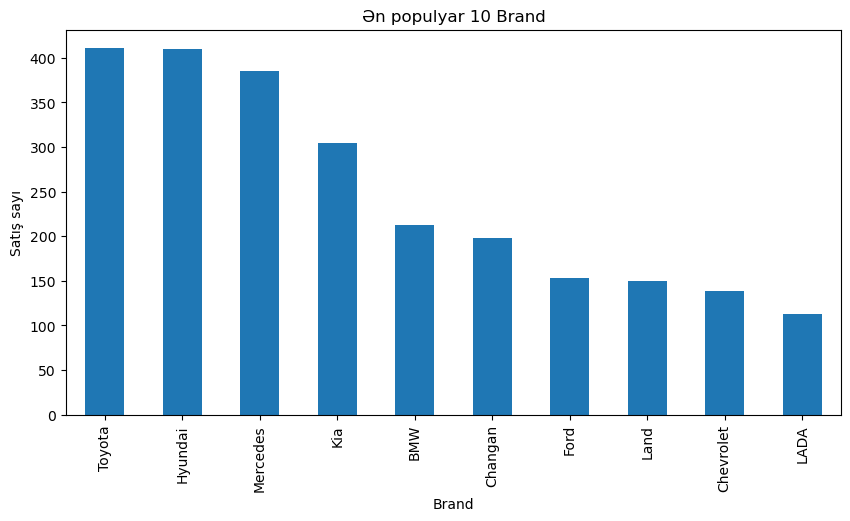


Model payı:
 Model
Elantra                   116
Sorento                   112
Rover Range Rover          86
Santa Fe                   82
Prius                      78
Sonata                     74
Camry                      71
Transit                    66
Fusion (North America)     62
Cruze                      56
Name: count, dtype: int64


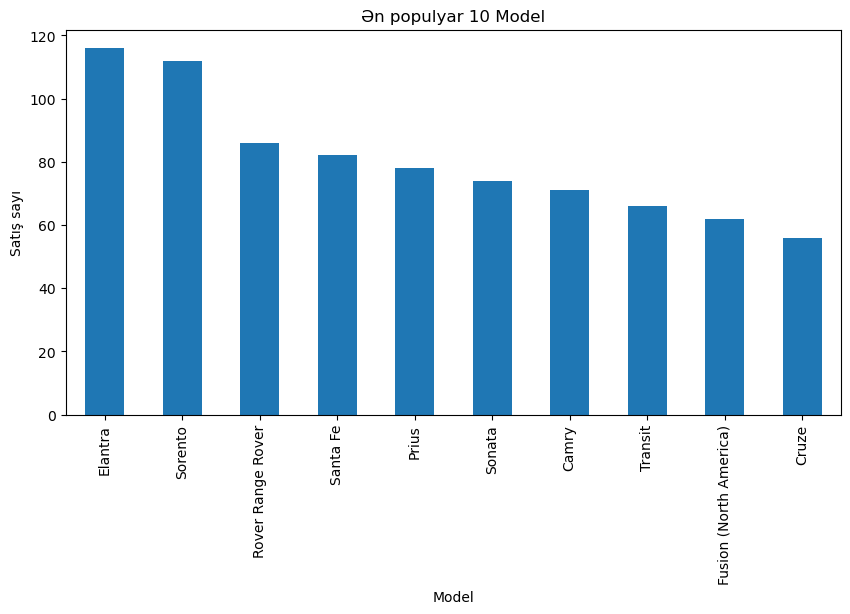


Fuel Type payı:
 Fuel Type
Benzin            1891
Dizel              671
Hibrid             391
Plug-in Hibrid     385
Dizel-Hibrid         4
Qaz                  1
Name: count, dtype: int64


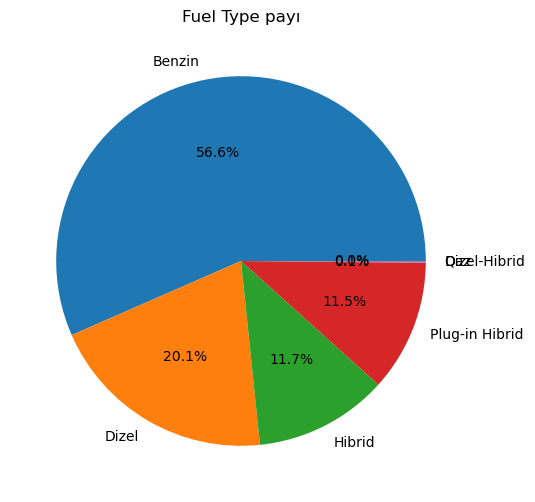


Body Type payı:
 Body Type
Sedan                      1336
Offroader / SUV, 5 qapı    1267
Hetçbek, 5 qapı             155
Liftbek                     124
Furqon                       79
Universal, 5 qapı            76
Yük maşını                   67
Minivan                      47
Pikap, ikiqat kabin          42
Offroader / SUV, 3 qapı      34
Name: count, dtype: int64


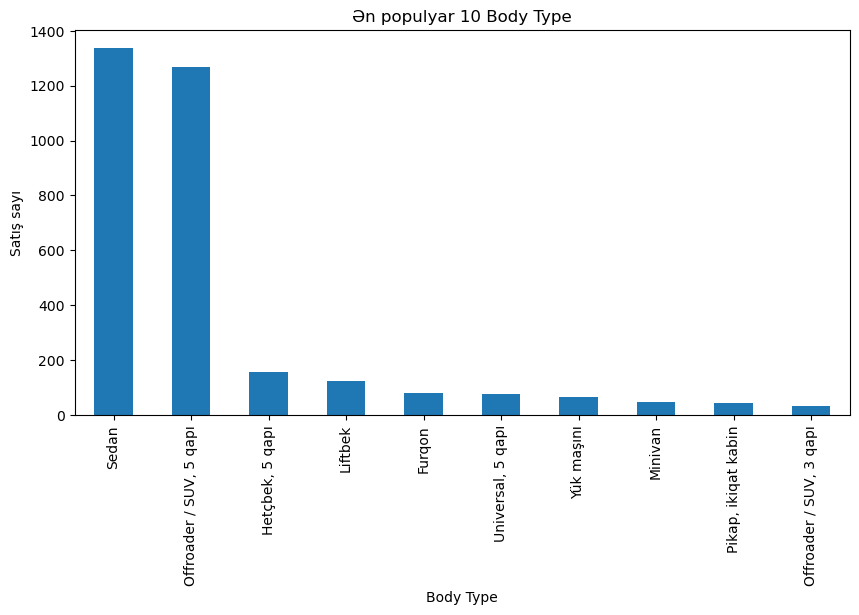

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
df_clean = pd.read_csv("data_cleaned_final.csv")

# 1 Brand üzrə bazar payı
brand_counts = df_clean['Brand'].value_counts()
print("Brand payı:\n", brand_counts.head(10))

# Bar chart ilə vizualizasiya
brand_counts.head(10).plot(kind='bar', figsize=(10,5), title="Ən populyar 10 Brand")
plt.ylabel("Satış sayı")
plt.show()

# 2 Model üzrə pay
model_counts = df_clean['Model'].value_counts()
print("\nModel payı:\n", model_counts.head(10))

model_counts.head(10).plot(kind='bar', figsize=(10,5), title="Ən populyar 10 Model")
plt.ylabel("Satış sayı")
plt.show()

# 3 Fuel Type üzrə pay
fuel_counts = df_clean['Fuel Type'].value_counts()
print("\nFuel Type payı:\n", fuel_counts)

fuel_counts.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%', title="Fuel Type payı")
plt.ylabel("")
plt.show()

# 4️ Body Type üzrə 
body_counts = df_clean['Body Type'].value_counts()
print("\nBody Type payı:\n", body_counts.head(10))

body_counts.head(10).plot(kind='bar', figsize=(10,5), title="Ən populyar 10 Body Type")
plt.ylabel("Satış sayı")
plt.show()
